## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# TASK 1 (Logistic Regression)

<AxesSubplot:>

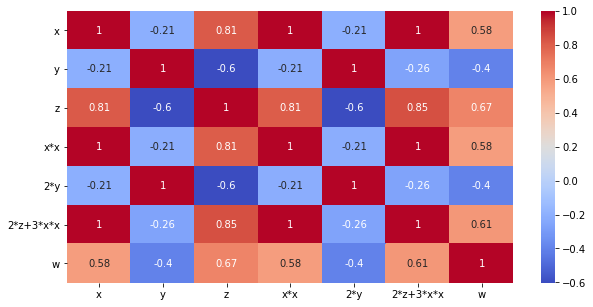

In [5]:
corr = data.drop(['target'], axis=1).corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

In [38]:
# finding the best model

clf = SGDClassifier(loss = 'log', eta0=0.001, learning_rate='constant', random_state=15)
clf.fit(X,Y)
print(clf.coef_, clf.intercept_)

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)
clf_1 = RandomizedSearchCV(model, hyperparameters, cv = 10)
best_model = clf_1.fit(X, Y)
best_C = best_model.best_estimator_.get_params()['C']
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_C)

[[ 0.50402148 -0.6139245   0.86018112  0.48716956 -0.6139245   0.54230865
   0.44452528]] [0.05028643]
Best Penalty: l2
Best C: 5.428675439323859


In [39]:
best_model = LogisticRegression(C= best_C)
best_model.fit(X, Y)
print('best model coeffs' , best_model.coef_)
print('average score' , best_model.score(X, Y))
y_pred = best_model.predict(X)
print('accuracy best model = ', 1 - np.mean(Y - y_pred))

best model coeffs [[ 0.99437279 -1.2009723   2.59803719  0.89200893 -1.2009723   1.11648296
   0.61103381]]
average score 1.0
accuracy best model =  1.0


In [40]:
# adding noise
X_n = X + (2*pow(10, -2)) 
best_model_n = LogisticRegression(C= best_C)
best_model_n.fit(X_n, Y)
y_pred_n = best_model_n.predict(X_n)
print("best_model_accuracy_edited = ", 1 - np.mean(Y - y_pred_n)) 
print('best_model_n coeff', best_model_n.coef_)

best_model_accuracy_edited =  1.0
best_model_n coeff [[ 0.99435706 -1.20099026  2.59798238  0.89205089 -1.20099026  1.11651146
   0.61102283]]


Observation:

In [28]:
After adding noise, the difference in weights of the best model before noise addition 
and after noise addition is almost negligeable. 
Hence, accuracy also remains unchanged.

SyntaxError: invalid syntax (<ipython-input-28-2abed4609be4>, line 1)

In [27]:
print(best_model.coef_ - best_model_n.coef_)

[[0. 0. 0. 0. 0. 0. 0.]]


# Task 2 (SVM)

In [29]:
clf = SGDClassifier(loss = 'hinge', eta0=0.001, learning_rate='constant', random_state=15)
clf.fit(X,Y)
print(clf.coef_, clf.intercept_)

[[ 0.24236784 -0.33526241  0.51266549  0.23021862 -0.33526241  0.26909411
   0.20893998]] [0.075]


In [43]:
# hyperparameter tuning
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
C = np.logspace(1, 5, 50)
hyperparameters = dict(C=C)
clf_1 = RandomizedSearchCV(model, hyperparameters, cv = 10)
best_model = clf_1.fit(X, Y)
best_C = best_model.best_estimator_.get_params()['C']
print('Best C:', best_C)

Best C: 22229.96482526191


In [45]:
best_model_svm = SVC(C= best_C, kernel = 'linear')
best_model_svm.fit(X, Y)
print('best model coeffs' , best_model_svm.coef_)
print('average score' , best_model_svm.score(X, Y))
y_pred = best_model_svm.predict(X)
print('accuracy best model = ', 1 - np.mean(Y - y_pred))

best model coeffs [[ 0.42059793 -0.36090175  1.04442829  0.34263578 -0.36090175  0.43447147
   0.17056102]]
average score 1.0
accuracy best model =  1.0


In [46]:
# adding noise
X_n = X + (2*pow(10, -2)) 
best_model_n = SVC(C= best_C, kernel = 'linear')
best_model_n.fit(X_n, Y)
y_pred_n = best_model_n.predict(X_n)
print("best_model_accuracy_edited = ", 1 - np.mean(Y - y_pred_n)) 
print('best_model_n coeff', best_model_n.coef_)

best_model_accuracy_edited =  1.0
best_model_n coeff [[ 0.42044218 -0.36101302  1.0444607   0.34255851 -0.36101302  0.43440583
   0.16993842]]


In [47]:
print(best_model_svm.coef_ - best_model_n.coef_)

[[ 1.55747208e-04  1.11267938e-04 -3.24085062e-05  7.72755367e-05
   1.11267938e-04  6.56359490e-05  6.22603107e-04]]


In [78]:
feat = {k: v for k,v in list(enumerate(data.drop(['target'], axis=1).columns))}
list_wt_diff = (best_model_svm.coef_ - best_model_n.coef_).tolist()
weight_diff = [(i, abs(x)) for i, x in enumerate(list_wt_diff[0])]
weight_diff.sort(key = lambda x: x[1], reverse = True)
l = weight_diff[:4]
# print top 4 features with most change in weights
for i in l:
    print(feat[i[0]], end = ' ')

w x y 2*y 

Observation:

In [ ]:
best model accuracy for SVM before and after addition of noises are same, because of the change in difference of weights
in the range of (10^-5 , 10^-4) , however, it's more prominent as compared to that of weight difference in the case of Logistic 
Regression, suggesting that LR is comparatively more robust when noise is added to the data.